In [7]:
from dt_apriltags import Detector
import numpy as np
import cv2
from pid import *
from april_tag import *
import matplotlib.pyplot as plt

In [8]:
def draw_tags(tags: list, img: np.ndarray):
    """Draws a list of tags into the image.
    Args:
        tags (list[tag]): the list of tags to render
        img (_type_): the image to render tags on
    Returns:
        img: the image with tags drawn onto it
    """
    for tag in tags:
        for idx in range(len(tag.corners)):
            cv2.line(
                img,
                tuple(tag.corners[idx - 1, :].astype(int)),
                tuple(tag.corners[idx, :].astype(int)),
                (0, 255, 0),
                thickness=10,
            )
        cv2.line(
            img,
            (int(img.shape[1] / 2), int(img.shape[0] / 2)),
            (int(tag.center[0]), int(tag.center[1])),
            (0, 0, 255),
            thickness=10,
        )

    return img

In [9]:
def draw_outputs(
    img: np.ndarray, outputs: tuple[list[float], list[float]], tags: list
) -> np.ndarray:
    """Draws the outputs corresponding to each tag onto the image.
    Args:
        img (np.ndarray): the image
        outputs (tuple[list[float], list[float]]): the list of pid output values
        tags (list): the list of tags
    Returns:
        np.ndarray: the image with outputs drawn onto it
    """
    h_off_center = 25
    space_between_tags = 50
    v_off_center = 50
    for i in range(len(outputs) - 1):
        tag = tags[i]
        horizontal = outputs[0][i]
        vertical = outputs[1][i]
        cv2.putText(
            img,
            f"Tag {tag.tag_id}",
            org=(
                int(img.shape[1] / 2) + h_off_center + space_between_tags * (i),
                int(img.shape[0] / 2),
            ),
            fontFace=cv2.FONT_HERSHEY_TRIPLEX,
            fontScale=1.5,
            color=(0, 0, 255),
        )
        cv2.putText(
            img,
            f"Horizontal: {horizontal:.2f}%",
            org=(
                int(img.shape[1] / 2) + h_off_center + space_between_tags * (i),
                int(img.shape[0] / 2) + v_off_center,
            ),
            fontFace=cv2.FONT_HERSHEY_TRIPLEX,
            fontScale=1.5,
            color=(0, 0, 255),
        )
        cv2.putText(
            img,
            f"Vertical: {vertical:.2f}%",
            org=(
                int(img.shape[1] / 2) + h_off_center + space_between_tags * (i),
                int(img.shape[0] / 2) + 2 * v_off_center,
            ),
            fontFace=cv2.FONT_HERSHEY_TRIPLEX,
            fontScale=1.5,
            color=(0, 0, 255),
        )
    return img

In [19]:
cap = cv2.VideoCapture('at_AUV_vid.mkv')
for i in range(4000):
    ret, frame1 = cap.read()
cap.release()

[NULL @ 0x13f530c0] missing picture in access unit with size 23
[h264 @ 0x13454840] no frame!
[NULL @ 0x13f530c0] missing picture in access unit with size 23
[h264 @ 0x7f44088250] no frame!
[NULL @ 0x13f530c0] missing picture in access unit with size 23
[h264 @ 0x7f4408bc60] no frame!
[NULL @ 0x13f530c0] missing picture in access unit with size 23
[h264 @ 0x7f44088250] no frame!
[NULL @ 0x13f530c0] missing picture in access unit with size 23
[h264 @ 0x7f4408bc60] no frame!
[NULL @ 0x13f530c0] missing picture in access unit with size 23
[h264 @ 0x7f44088250] no frame!
[NULL @ 0x13f530c0] missing picture in access unit with size 23
[h264 @ 0x7f44088250] no frame!
[NULL @ 0x13f530c0] missing picture in access unit with size 23
[h264 @ 0x13454840] no frame!
[NULL @ 0x13f530c0] missing picture in access unit with size 23
[h264 @ 0x13f4d950] no frame!
[NULL @ 0x13f530c0] missing picture in access unit with size 23
[h264 @ 0x13f4d950] no frame!
[NULL @ 0x13f530c0] missing picture in access un

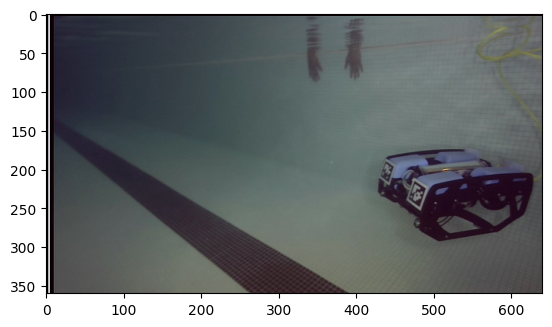

In [20]:
plt.imshow(frame1)

In [23]:
tags = get_tags(cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY))

tag(s) found!


In [25]:
img = draw_tags(tags, frame1)


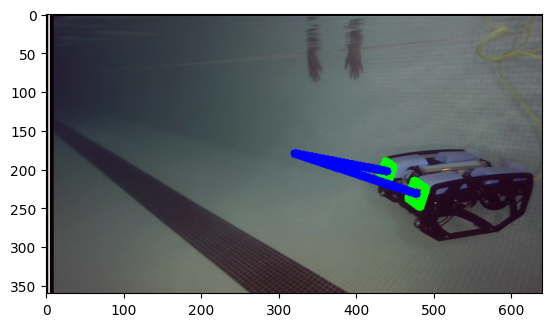

In [26]:
plt.imshow(img)

In [27]:
cap = cv2.VideoCapture('at_AUV_vid.mkv')
ret, frame1 = cap.read()
height, width, layers = frame1.shape
size = (width, height)
out = cv2.VideoWriter("rendered_tags.mp4", cv2.VideoWriter_fourcc(*'mp4v'), 30, size)

count = 0 # the number of frames since the last    
while ret:
    ret, frame = cap.read()
    if not ret:
        break

    print(f"now on frame {count}...")
    tags = get_tags(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))
    img = draw_tags(tags, frame)

    out.write(frame)

    count += 1

cap.release()
out.release()
print("Finished rendering the video.")

now on frame 0...
now on frame 1...
now on frame 2...
now on frame 3...
now on frame 4...
now on frame 5...
now on frame 6...
now on frame 7...
now on frame 8...
now on frame 9...
now on frame 10...
now on frame 11...
now on frame 12...
now on frame 13...
now on frame 14...
now on frame 15...
now on frame 16...
now on frame 17...
now on frame 18...
now on frame 19...
now on frame 20...
now on frame 21...
now on frame 22...
now on frame 23...
now on frame 24...
now on frame 25...
now on frame 26...
now on frame 27...
now on frame 28...
now on frame 29...
now on frame 30...
now on frame 31...
now on frame 32...
now on frame 33...
now on frame 34...
now on frame 35...
now on frame 36...
now on frame 37...
now on frame 38...
now on frame 39...
now on frame 40...
now on frame 41...
now on frame 42...
now on frame 43...
now on frame 44...
now on frame 45...
now on frame 46...
now on frame 47...
now on frame 48...
now on frame 49...
now on frame 50...
now on frame 51...
now on frame 52...
now

[NULL @ 0x1368b590] missing picture in access unit with size 23
[h264 @ 0x13f4d950] no frame!


now on frame 124...
now on frame 125...
Finished rendering the video.
